# SVM (Support Vector Machines):
* SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.


we will use SVM to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.


In [52]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [44]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv")
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Data pre-processing

In [45]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [62]:
df['Class'].unique()

array([2, 4], dtype=int64)

It looks like the BareNuc column includes some values that are not numerical. 

In [46]:
df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [53]:
# remove non-numeric values
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df['BareNuc'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [63]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1:]
x

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


# Test-Train split

In [64]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (546, 9) (546, 1)
Test set: (137, 9) (137, 1)


# SVM Modeling
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [65]:
from sklearn import svm
mdl = svm.SVC(kernel='rbf')
mdl.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
ypred = mdl.predict(x_test)
ypred[0:20]

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2],
      dtype=int64)

In [82]:
y_test[0:20].values

array([[2],
       [4],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

# Evaluation

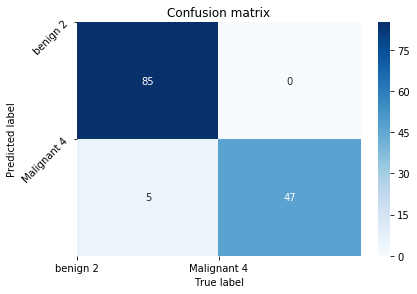

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(ypred, y_test)
np.set_printoptions(precision=2)

# print("Confusion matrix:\n",cm)
sns.heatmap(cm, annot=True ,cmap=plt.cm.Blues)
plt.xticks(np.arange(2), ['benign 2','Malignant 4'])
plt.yticks(np.arange(2), ['benign 2','Malignant 4'],rotation=45)
plt.title("Confusion matrix")
plt.tight_layout()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [74]:
print (classification_report(y_test, ypred))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# F1-SCORE

In [84]:
from sklearn.metrics import f1_score
f1_score(y_test, ypred, average='weighted') 

0.9639038982104676

# JACCARD INDEX

In [85]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, ypred
                        )

0.9635036496350365

Let's try with linear kernel:

In [87]:
mdl2 = svm.SVC(kernel='linear')
mdl2.fit(x_train, y_train) 
ypred2 = mdl2.predict(x_test)
print("Avg F1-score: %.4f" % f1_score(y_test, ypred2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, ypred2))


Avg F1-score: 0.9639
Jaccard score: 0.9635
